# Gun Deaths in the United States
## an illuminating exercise in data analysis

The following notebook was used to analyze a dataset listing gun deaths in the United States by various statistics.  The main objective was to gain experience loading and parsing a csv file to then perform analysis.  

In [22]:
%matplotlib inline

import csv
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

f = open("guns.csv","r")
csvreader = csv.reader(f)
data = list(csvreader)
data_with_head = data
headers = data.pop(0)

head = {}
if head == {}:
    for i, headers in enumerate(headers): 
        if headers != '': head[headers] = int(i)
# problem when repeating pulls the first letter or something?

#print(headers)
#print(data[0:5], data[-5])

head

{'age': 6,
 'education': 10,
 'hispanic': 8,
 'intent': 3,
 'month': 2,
 'place': 9,
 'police': 4,
 'race': 7,
 'sex': 5,
 'year': 1}

In [18]:
year = [row[1] for row in data]
year_counts = {}
for x in year:
    if x in year_counts: year_counts[x] += 1
    else: year_counts[x] = 1
print(year_counts)

{'2012': 33563, '2014': 33599, '2013': 33636}


In [3]:
import datetime as dt
dates = [dt.datetime(year = int(row[1]), month = int(row[2]), day=1) for row in data]
dates[0:5]
date_counts = {}
for x in dates:
    if x in date_counts: date_counts[x] += 1
    else: date_counts[x] = 1


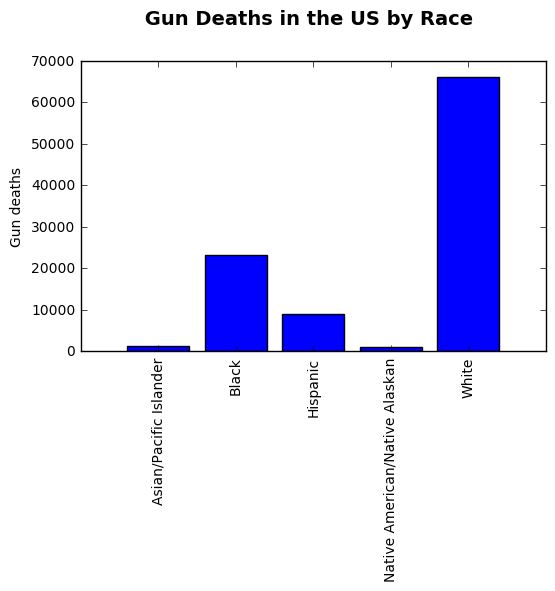

In [4]:
def sort_dict_plot(dictionary, bt, a_x = ""):
    sorted_keys = sorted(dictionary.keys())
    sorted_values = [dictionary[val] for val in sorted_keys]
    title = a_x + " Gun Deaths in the US by " + bt
    fig = plt.figure()
    fig.suptitle(title, fontsize=14, fontweight='bold')

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=0.85)
    #ax.set_title('axes title')
    #ax.set_xlabel('xlabel')
    ax.set_ylabel('Gun deaths')
    
    plt.bar(range(len(sorted_values)),sorted_values, align='center')
    plt.xticks(range(len(sorted_values)),sorted_keys,rotation=90)
    ax = plt.gca()
    #plt.set_ylabel("Gun Deaths")
    plt.show()
    

def probe_data(data, x):
    raw = [row[x] for row in data]
    dataset = {}
    for x in raw:
        if x in dataset: dataset[x] += 1
        else: dataset[x] = 1
    return dataset

race_counts = probe_data(data, head['race'])
sort_dict_plot(race_counts, 'Race')


In [5]:
cen = csv.reader(open('census.csv','r'))
census = list(cen)
mapping = {
    "Asian/Pacific Islander": int(census[1][14]) + int(census[1][15]),
    "Black" : int(census[1][12]),
    "Native American/Native Alaskan": int(census[1][13]),
    "Hispanic": int(census[1][11]),
    "White": int(census[1][10])
}

mapping


{'Asian/Pacific Islander': 15834141,
 'Black': 40250635,
 'Hispanic': 44618105,
 'Native American/Native Alaskan': 3739506,
 'White': 197318956}

In [6]:
race_per_hundredk = {}
for key in race_counts:
    race_per_hundredk[key] = round((race_counts[key] / mapping[key]) * 100000,4)
race_per_hundredk

{'Asian/Pacific Islander': 8.3743,
 'Black': 57.8773,
 'Hispanic': 20.2205,
 'Native American/Native Alaskan': 24.522,
 'White': 33.5685}

In [7]:
intent = [x[3] for x in data]
race = [x[7] for x in data]
homicide_race_per_hundredk = {}

for i, race in enumerate(race):
    if intent[i] == 'Homicide':
        if race in homicide_race_per_hundredk: 
            homicide_race_per_hundredk[race] += 1
        else:
            homicide_race_per_hundredk[race] = 1

for key in homicide_race_per_hundredk:
    homicide_race_per_hundredk[key] = round(100000*(homicide_race_per_hundredk[key] / mapping[key]),4)

homicide_race_per_hundredk

{'Asian/Pacific Islander': 3.5303,
 'Black': 48.4713,
 'Hispanic': 12.6272,
 'Native American/Native Alaskan': 8.7177,
 'White': 4.6356}

## Homicide rates by race per 100,000
After separating gun deaths by homicide and then by race and dividing the amount to 100,000 of that race, it is clear the enormous disparity between different races.  Blacks suffer homicide rates **10 times** the amount of Whites and 4 times the next largest racial group, Hispanic. 

Next I will do the same analysis but selecting for suicide by first defining a function that will allow me to select between two variables easier.

Data being normalized by national demograpics population
# Generated rates of intent [ Suicide ] by  race


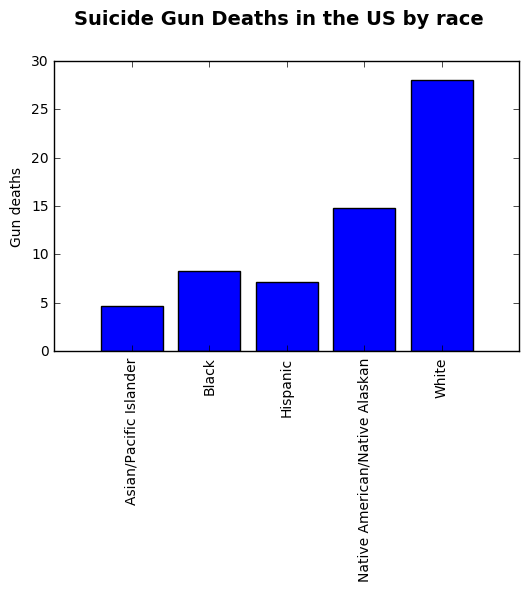

{'Asian/Pacific Islander': 4.705, 'Hispanic': 7.107, 'White': 28.0622, 'Native American/Native Alaskan': 14.8415, 'Black': 8.2781}
Data being normalized by national demograpics population
# Generated rates of intent [ Homicide ] by  race


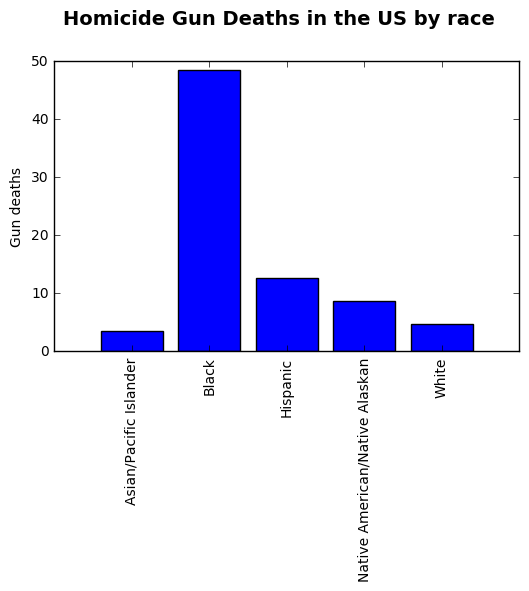

In [8]:
def ab_data_slice(data, head, at, a_x, bt):
    a = head[at]
    b = head[bt]
    a_list = [x[a] for x in data]
    b_list = [x[b] for x in data]

    data_per_100k = {}
    
    for i, b_list in enumerate(b_list):
        if a_list[i] == a_x:
            if b_list in data_per_100k: 
                data_per_100k[b_list] += 1
            else:
                data_per_100k[b_list]  = 1
    if bt == 'race':
        print("Data being normalized by national demograpics population")
        for key in data_per_100k:
            data_per_100k[key] = round(100000*(data_per_100k[key] / mapping[key]),4)
    print("# Generated rates of", at, "[", a_x, "] by ", bt)
        
    sort_dict_plot(data_per_100k,bt,a_x)
    return(data_per_100k)

suicide_by_race = ab_data_slice(data,head,'intent','Suicide','race')
print(suicide_by_race)
homicide_by_race = ab_data_slice(data,head,'intent','Homicide','race')

I'd like to be able to do the ab_slice by header name rather than having to look up the index. I'll need to change the header list into a dictionary.

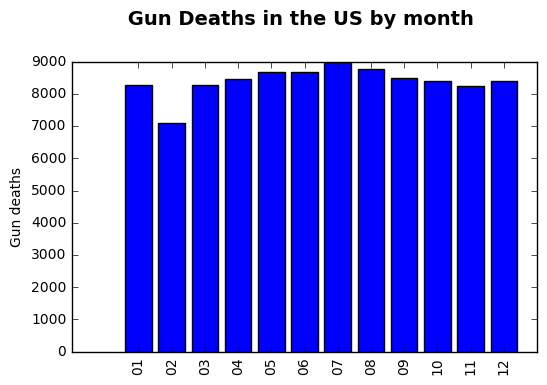

month_probe created


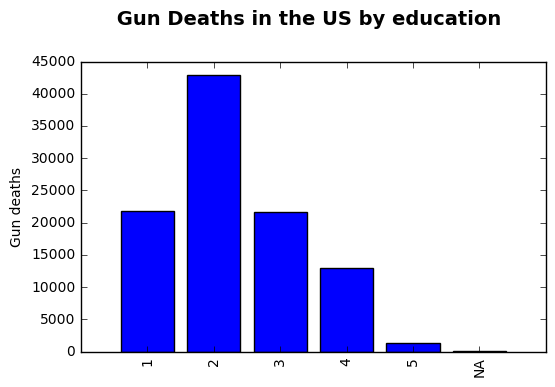

education_probe created


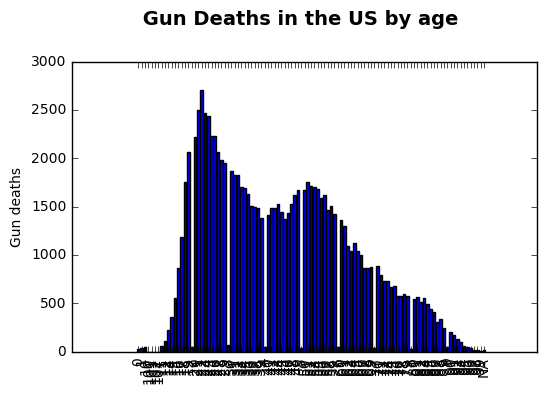

age_probe created


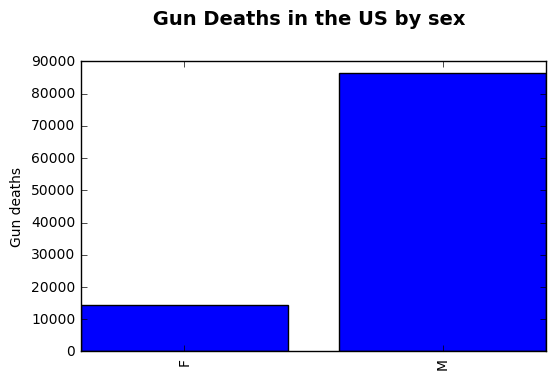

sex_probe created


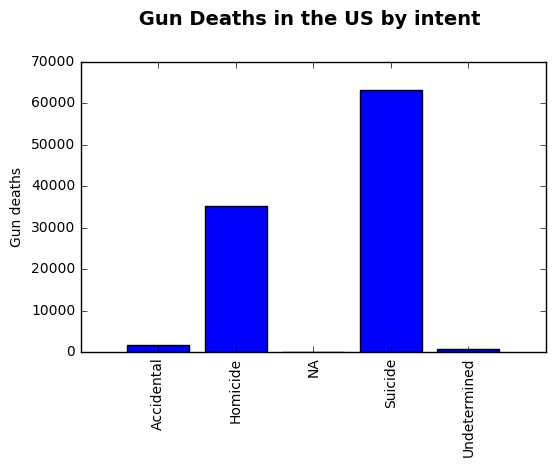

intent_probe created


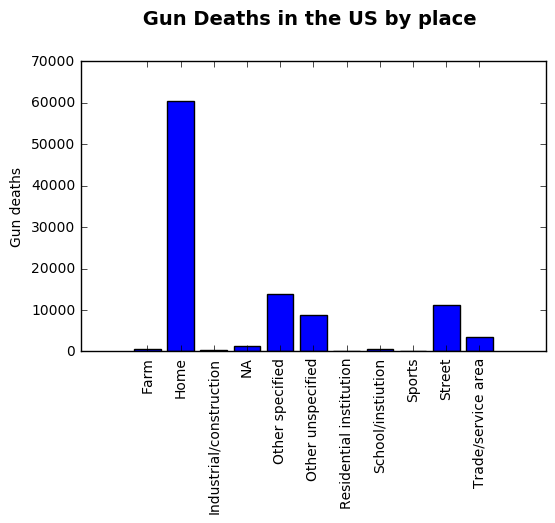

place_probe created


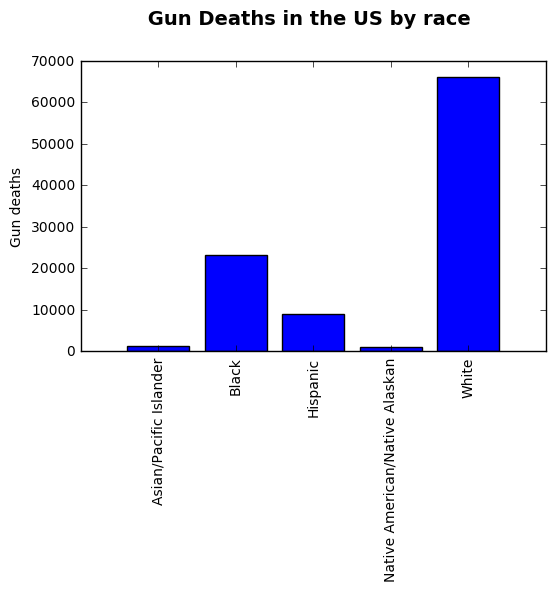

race_probe created


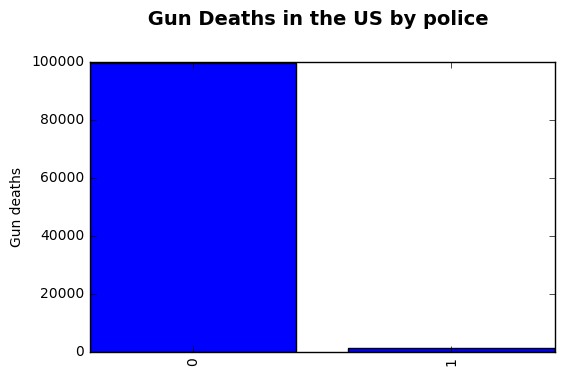

police_probe created


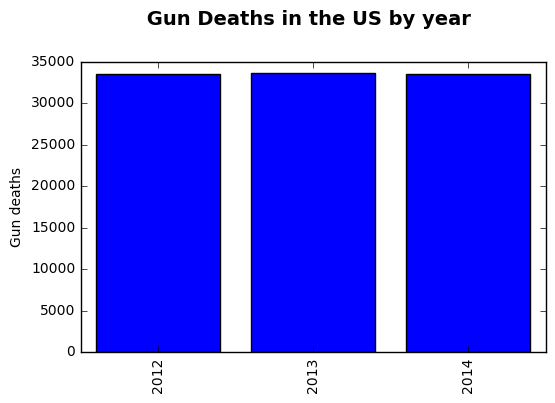

year_probe created


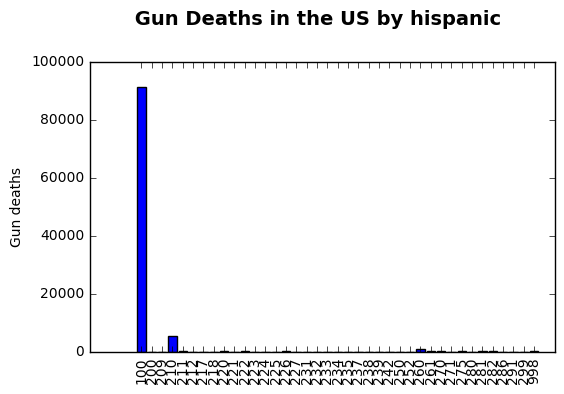

hispanic_probe created
{'month': 2, 'education': 10, 'age': 6, 'sex': 5, 'intent': 3, 'place': 9, 'race': 7, 'police': 4, 'year': 1, 'hispanic': 8}


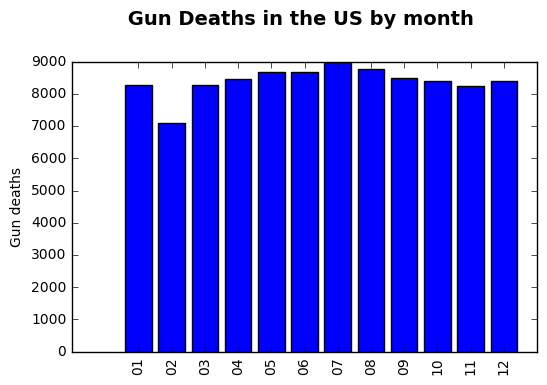

month_probe created


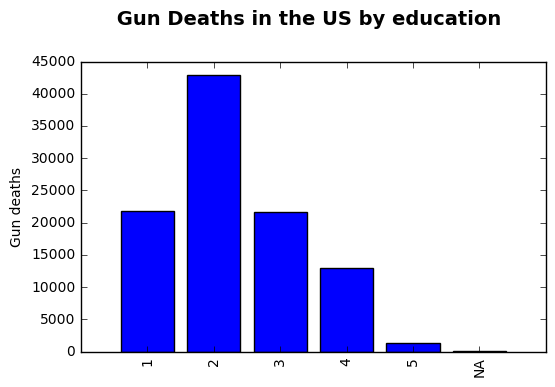

education_probe created


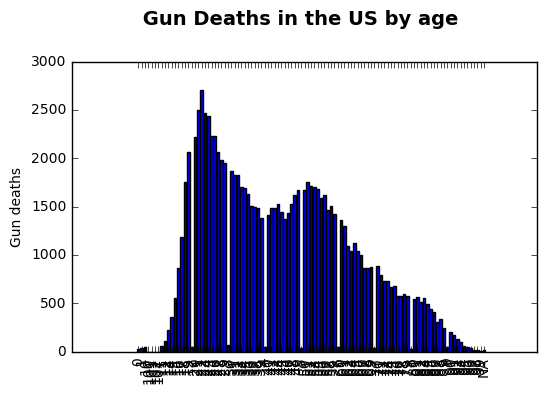

age_probe created


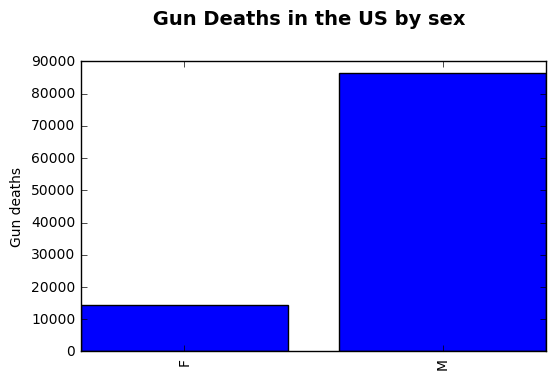

sex_probe created


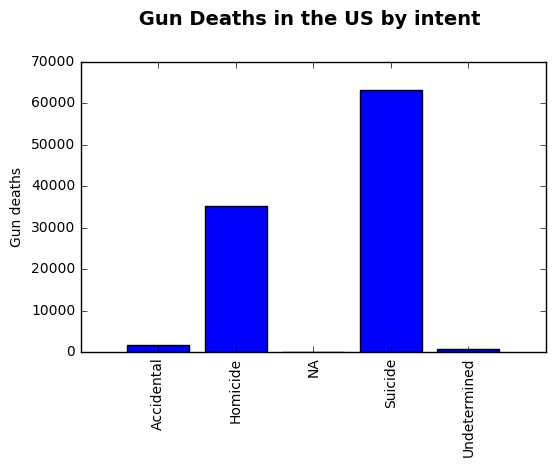

intent_probe created


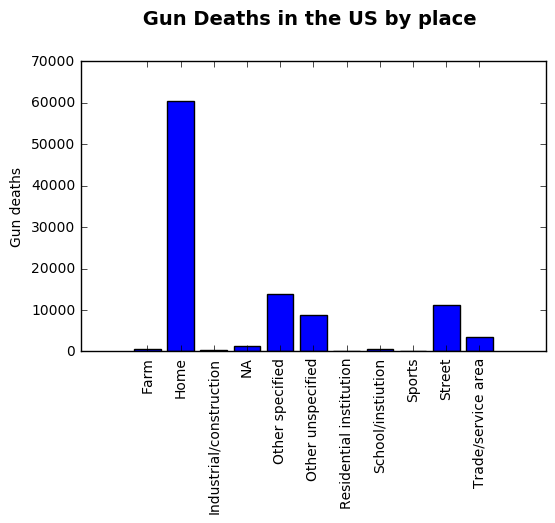

place_probe created


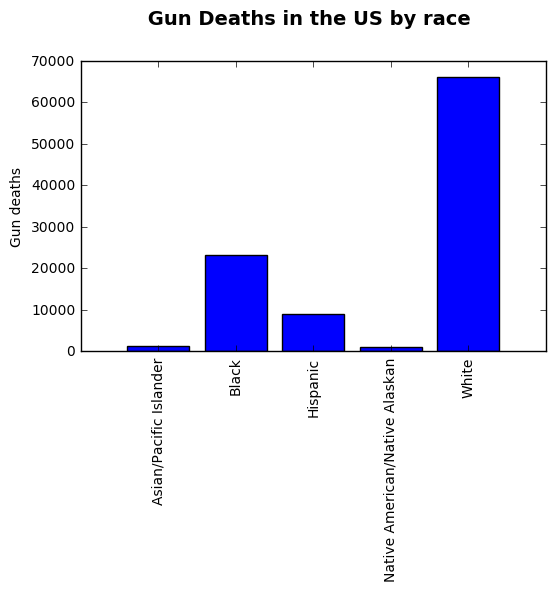

race_probe created


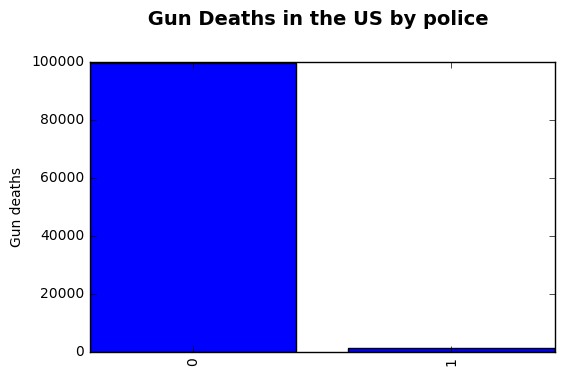

police_probe created


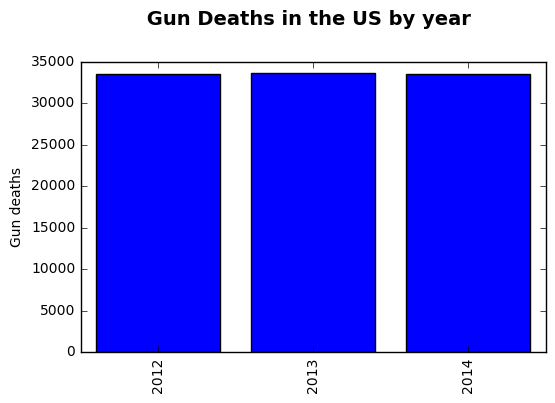

year_probe created


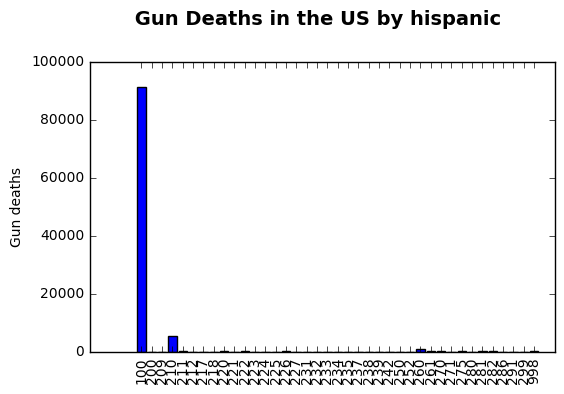

hispanic_probe created


In [11]:

for x in head:
    probe_name = x + "_probe"
    exec(probe_name + "= probe_data(data,head[x])")
    exec("sort_dict_plot("+probe_name+",'"+x+"')")
    print(probe_name + " created") 
        
probe_all(data,head)

    #exec("plt.bar(range(len("+probe_name+")), "+probe_name+".values(), align='center')")
    #exec("plt.xticks(range(len("+probe_name+")), "+probe_name+".keys(),rotation=90)")
    #plt.show()
    

In [12]:
def high_low(probe):
    high = None
    low = None
    for x in probe:
        if high is None or probe[x] > high:
            high = probe[x]
            hlab = x
        if low is None or probe[x] < low:
            low = probe[x]
            llab = x
    return ({'high': {hlab: high}, 'low': {llab: low}})

age_hl = high_low(age_probe)
education_hl = high_low(education_probe)
place_hl = high_low(place_probe)
age_hl

{'high': {'22': 2712}, 'low': {'107': 1}}

# Generated rates of intent [ Accidental ] by  sex


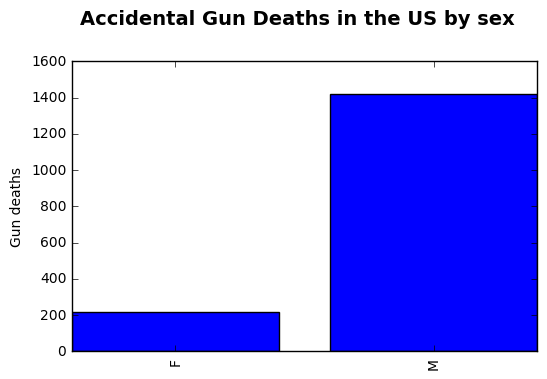

# Generated rates of intent [ Suicide ] by  sex


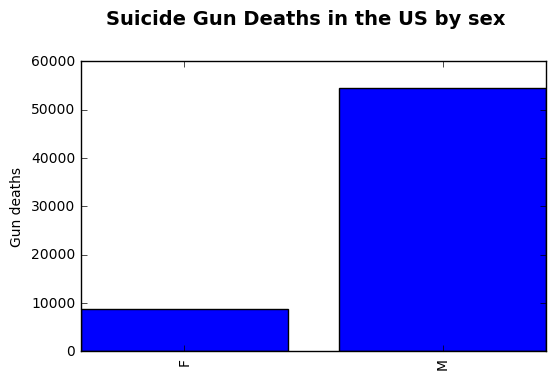

{'M': 54486, 'F': 8689}
# Generated rates of intent [ NA ] by  sex


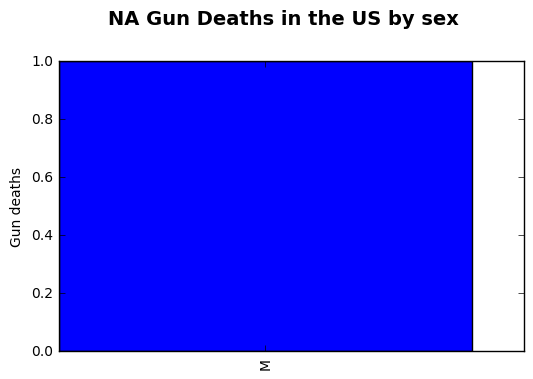

{'M': 1}
# Generated rates of intent [ Accidental ] by  sex


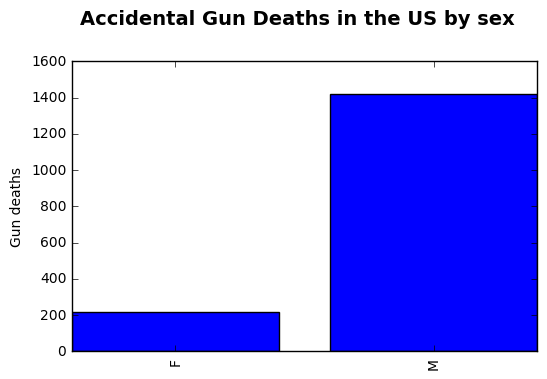

{'M': 1421, 'F': 218}
# Generated rates of intent [ Homicide ] by  sex


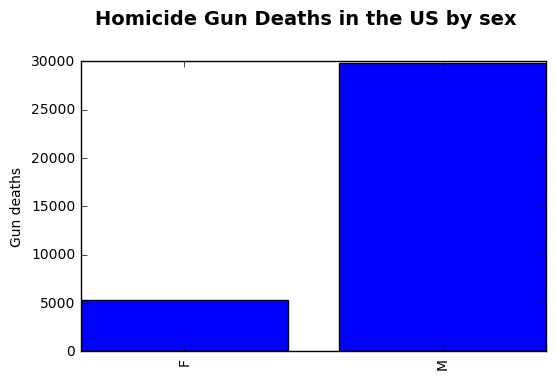

{'M': 29803, 'F': 5373}
# Generated rates of intent [ Undetermined ] by  sex


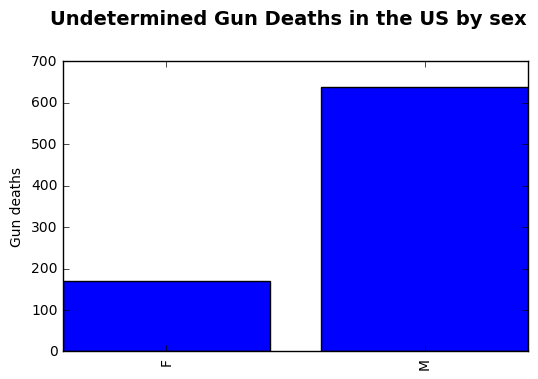

{'M': 638, 'F': 169}


In [16]:
gender_accident = ab_data_slice(data,head,'intent','Accidental','sex')

# Do all slices
for x in intent_probe:
    print(ab_data_slice(data,head,'intent',x,'sex'))
    

# Generated rates of place [ Farm ] by  education


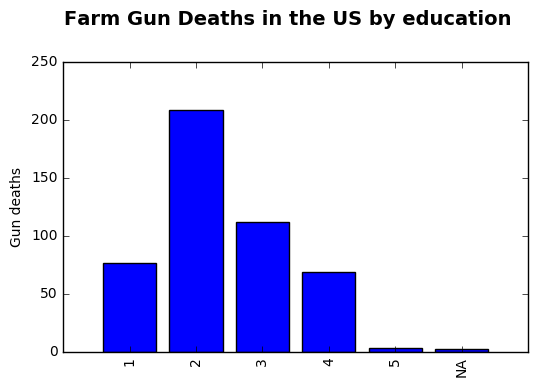

{'NA': 2, '2': 208, '4': 69, '5': 3, '3': 112, '1': 76}
# Generated rates of place [ Home ] by  education


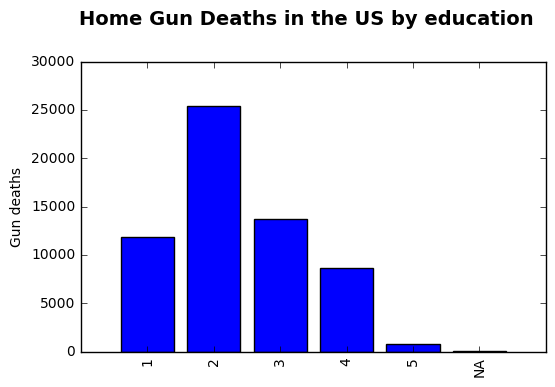

{'NA': 36, '2': 25443, '4': 8647, '5': 828, '3': 13718, '1': 11814}
# Generated rates of place [ Industrial/construction ] by  education


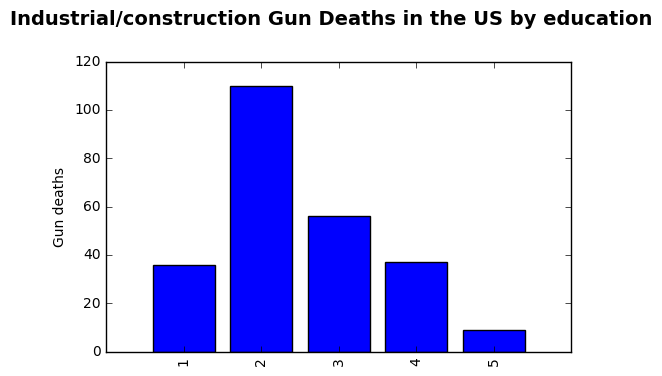

{'1': 36, '2': 110, '4': 37, '5': 9, '3': 56}
# Generated rates of place [ NA ] by  education


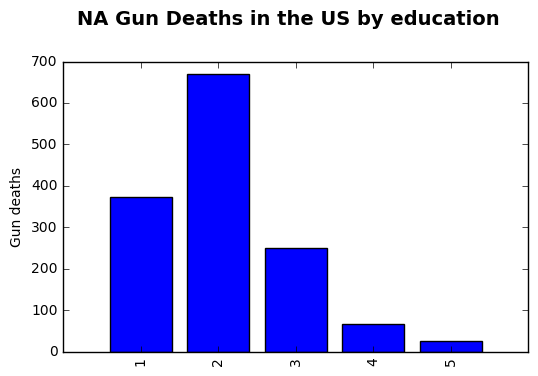

{'1': 373, '2': 669, '4': 67, '5': 26, '3': 249}
# Generated rates of place [ Other specified ] by  education


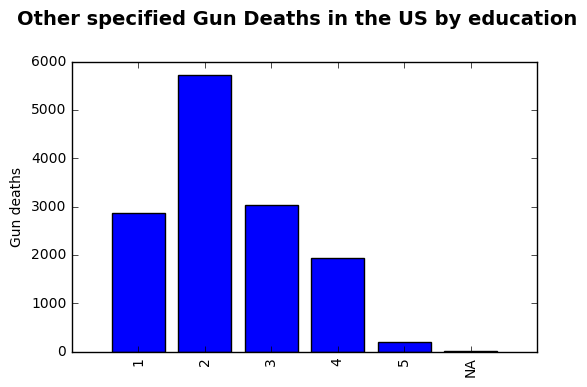

{'NA': 4, '2': 5714, '4': 1943, '3': 3030, '5': 201, '1': 2859}
# Generated rates of place [ Other unspecified ] by  education


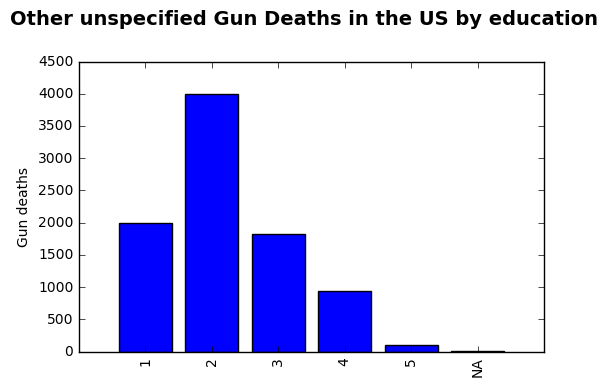

{'NA': 7, '2': 4003, '4': 945, '5': 104, '3': 1818, '1': 1990}
# Generated rates of place [ Residential institution ] by  education


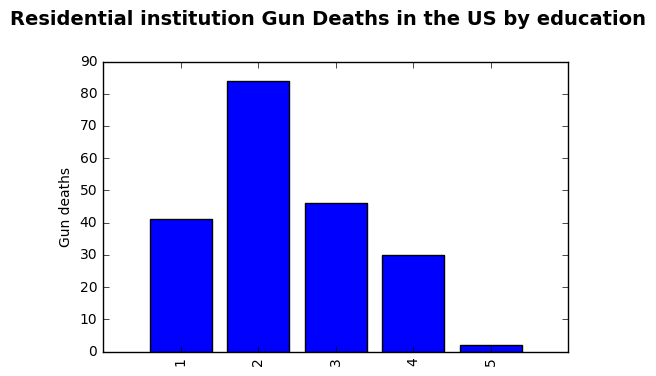

{'1': 41, '2': 84, '4': 30, '5': 2, '3': 46}
# Generated rates of place [ School/instiution ] by  education


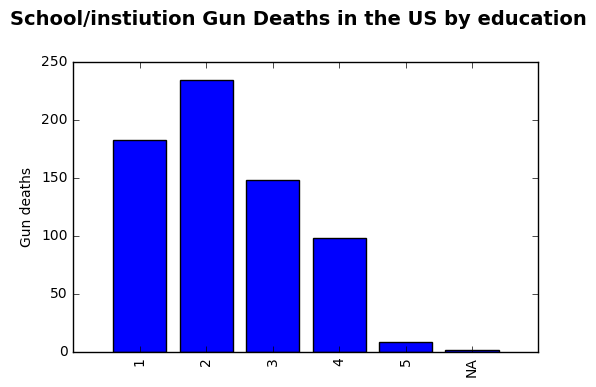

{'NA': 1, '2': 234, '4': 98, '3': 148, '5': 8, '1': 182}
# Generated rates of place [ Sports ] by  education


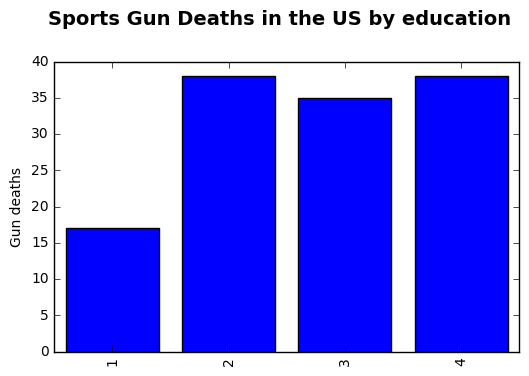

{'1': 17, '2': 38, '4': 38, '3': 35}
# Generated rates of place [ Street ] by  education


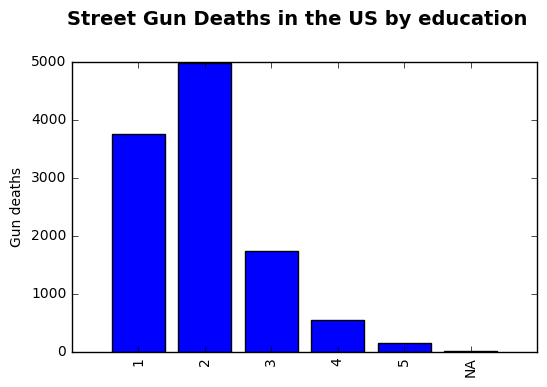

{'NA': 3, '2': 4977, '4': 551, '3': 1729, '5': 140, '1': 3751}
# Generated rates of place [ Trade/service area ] by  education


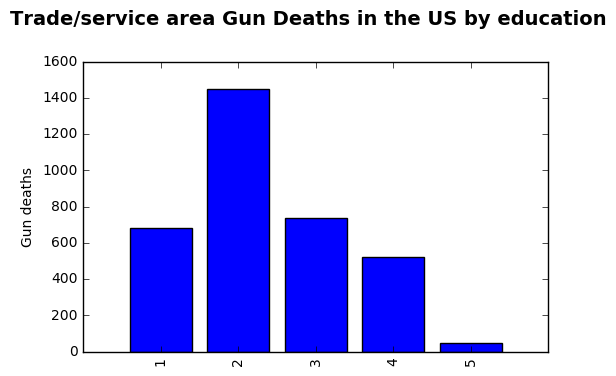

{'1': 684, '2': 1447, '4': 521, '5': 48, '3': 739}


In [14]:
for x in sorted(place_probe):
    print(ab_data_slice(data,head,'place',x,'education'))
    # needs to be regularized by number of census data

Data being normalized by national demograpics population
# Generated rates of month [ 01 ] by  race


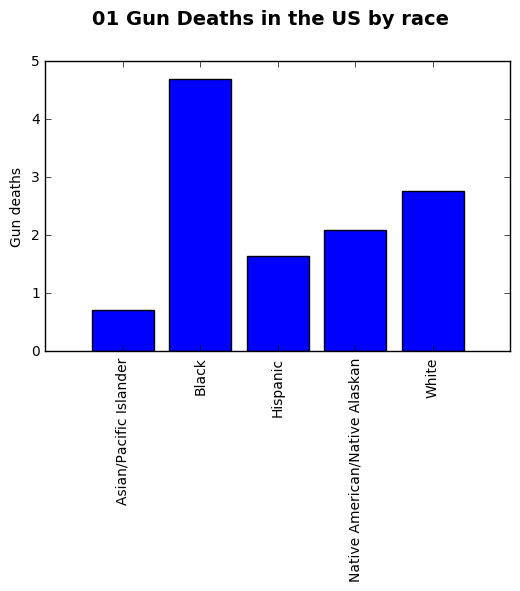

{'Asian/Pacific Islander': 0.7136, 'Hispanic': 1.6428, 'White': 2.7681, 'Native American/Native Alaskan': 2.0858, 'Black': 4.6881}
Data being normalized by national demograpics population
# Generated rates of month [ 02 ] by  race


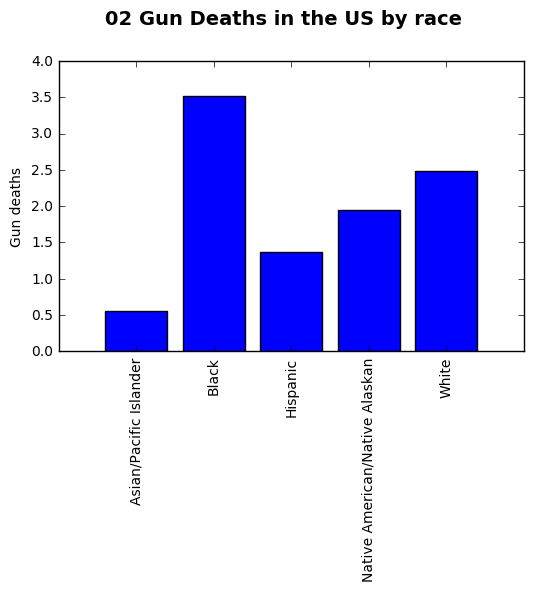

{'Asian/Pacific Islander': 0.5494, 'Hispanic': 1.3627, 'White': 2.4884, 'Native American/Native Alaskan': 1.9521, 'Black': 3.5155}
Data being normalized by national demograpics population
# Generated rates of month [ 03 ] by  race


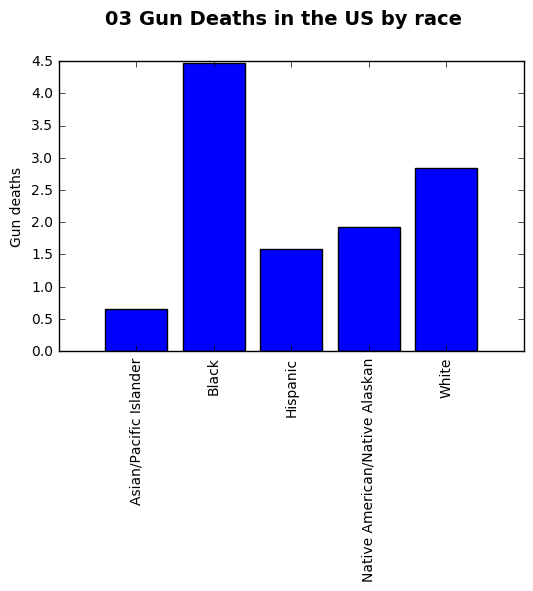

{'Asian/Pacific Islander': 0.6505, 'Hispanic': 1.5913, 'White': 2.8416, 'Native American/Native Alaskan': 1.9254, 'Black': 4.4645}
Data being normalized by national demograpics population
# Generated rates of month [ 04 ] by  race


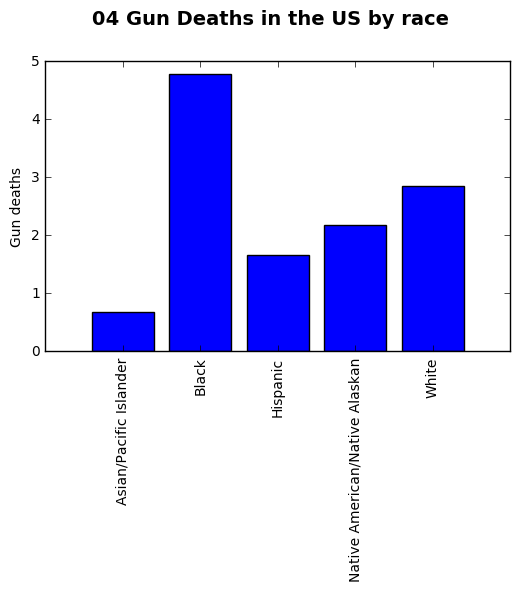

{'Asian/Pacific Islander': 0.6694, 'Hispanic': 1.6563, 'White': 2.8421, 'Native American/Native Alaskan': 2.1661, 'Black': 4.7726}
Data being normalized by national demograpics population
# Generated rates of month [ 05 ] by  race


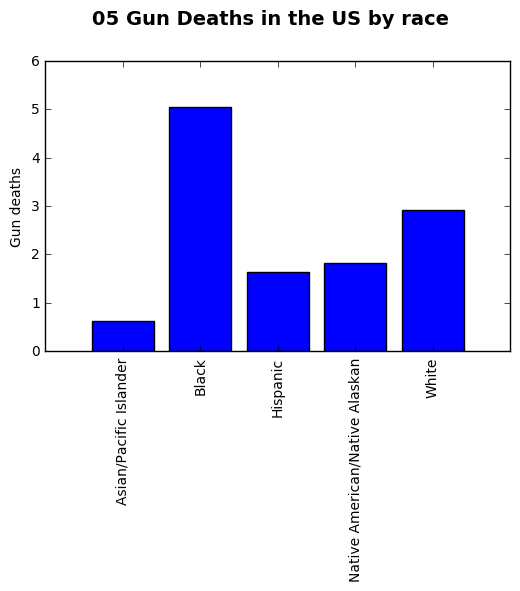

{'Asian/Pacific Islander': 0.6252, 'Hispanic': 1.6271, 'White': 2.9095, 'Native American/Native Alaskan': 1.8184, 'Black': 5.0558}
Data being normalized by national demograpics population
# Generated rates of month [ 06 ] by  race


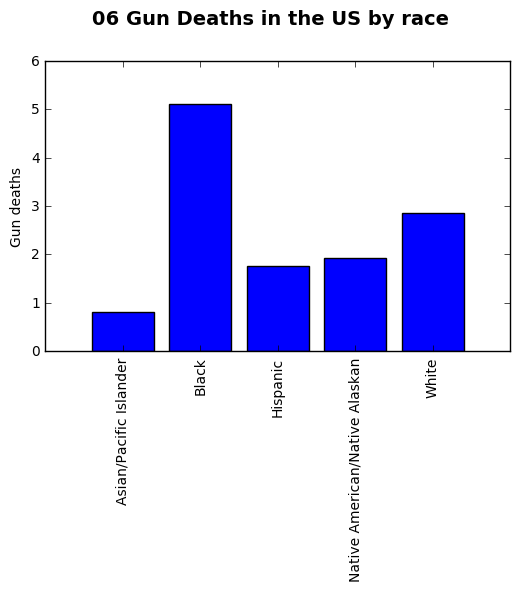

{'Asian/Pacific Islander': 0.8147, 'Hispanic': 1.7594, 'White': 2.8553, 'Native American/Native Alaskan': 1.9254, 'Black': 5.1105}
Data being normalized by national demograpics population
# Generated rates of month [ 07 ] by  race


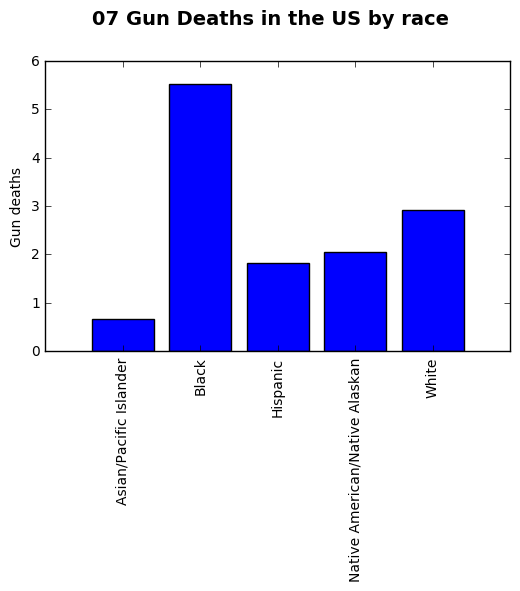

{'Asian/Pacific Islander': 0.6631, 'Hispanic': 1.8311, 'White': 2.9242, 'Native American/Native Alaskan': 2.0591, 'Black': 5.5154}
Data being normalized by national demograpics population
# Generated rates of month [ 08 ] by  race


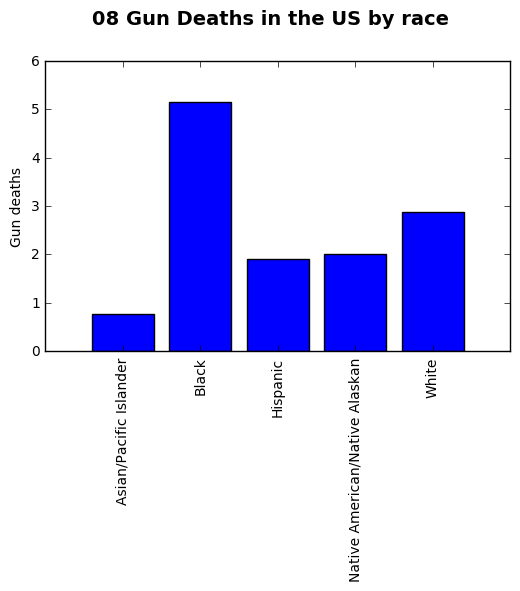

{'Asian/Pacific Islander': 0.7579, 'Hispanic': 1.9028, 'White': 2.8725, 'Native American/Native Alaskan': 2.0056, 'Black': 5.1453}
Data being normalized by national demograpics population
# Generated rates of month [ 09 ] by  race


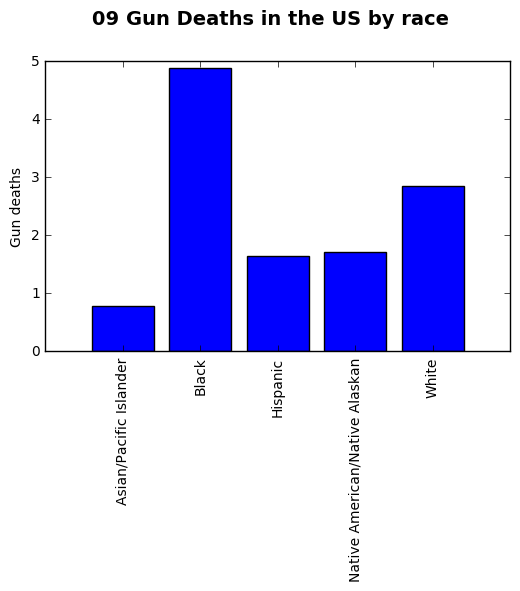

{'Asian/Pacific Islander': 0.7768, 'Hispanic': 1.6451, 'White': 2.8487, 'Native American/Native Alaskan': 1.7115, 'Black': 4.8844}
Data being normalized by national demograpics population
# Generated rates of month [ 10 ] by  race


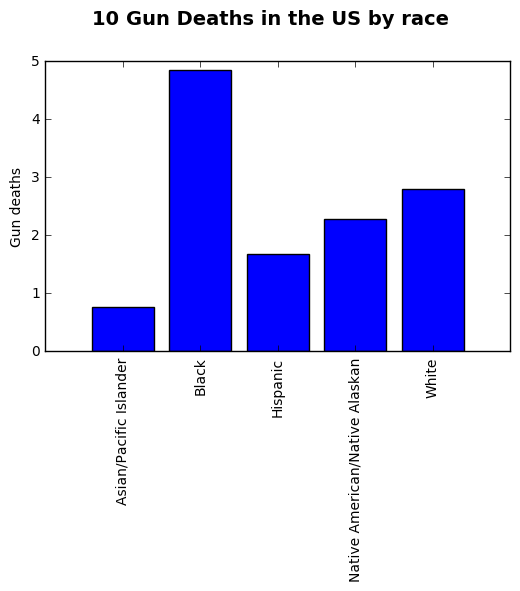

{'Asian/Pacific Islander': 0.7642, 'Hispanic': 1.6697, 'White': 2.7879, 'Native American/Native Alaskan': 2.273, 'Black': 4.8546}
Data being normalized by national demograpics population
# Generated rates of month [ 11 ] by  race


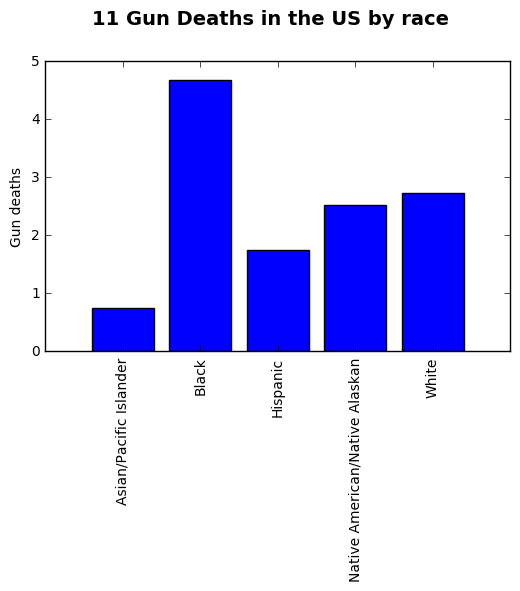

{'Asian/Pacific Islander': 0.7389, 'Hispanic': 1.7414, 'White': 2.722, 'Native American/Native Alaskan': 2.5137, 'Black': 4.6807}
Data being normalized by national demograpics population
# Generated rates of month [ 12 ] by  race


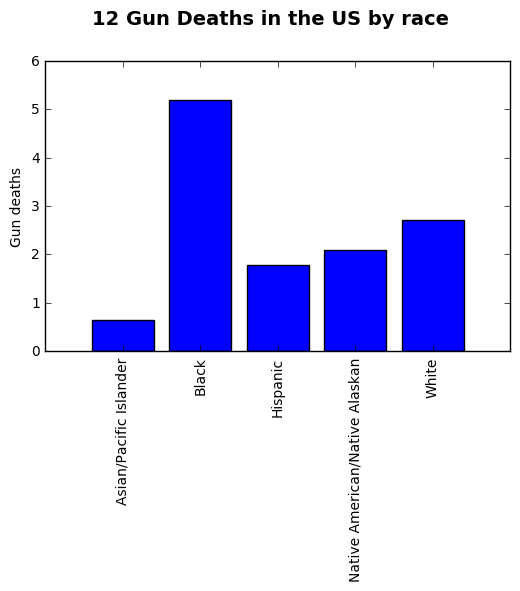

{'Asian/Pacific Islander': 0.6505, 'Hispanic': 1.7908, 'White': 2.7083, 'Native American/Native Alaskan': 2.0858, 'Black': 5.19}


In [15]:
for x in sorted(month_probe):
    print(ab_data_slice(data,head,'month',x,'race'))